In [ ]:
!python -m nltk.downloader all

/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipp

In [ ]:
! pip install --upgrade category_encoders

     |████████████████████████████████| 81kB 4.1MB/s 


In [ ]:
! pip install -U imbalanced-learn

     |████████████████████████████████| 174kB 5.1MB/s 
     |████████████████████████████████| 22.2MB 1.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from datetime import datetime
import time
import calendar
import re
import zipfile

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders 
from category_encoders.binary import BinaryEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold 
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Input, Flatten, BatchNormalization
from tensorflow.keras import initializers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP_Chatbot_Capstone_Project/data.csv')

In [ ]:
del df['Unnamed: 0'] 
df

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...
420,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


In [ ]:
df.describe()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
count,425,425,425,425,425,425,425,425,425,425
unique,287,3,12,3,5,6,2,3,33,411
top,2017-02-08 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,On 02/03/17 during the soil sampling in the re...
freq,6,251,90,241,316,143,403,189,232,3


In [ ]:
for i in range (0, df.shape[1]):
    print("Data type of feature/column ", df.columns[i]," is: ",type(df.iloc[1,i]))

Data type of feature/column  Data  is:  <class 'str'>
Data type of feature/column  Countries  is:  <class 'str'>
Data type of feature/column  Local  is:  <class 'str'>
Data type of feature/column  Industry Sector  is:  <class 'str'>
Data type of feature/column  Accident Level  is:  <class 'str'>
Data type of feature/column  Potential Accident Level  is:  <class 'str'>
Data type of feature/column  Genre  is:  <class 'str'>
Data type of feature/column  Employee or Third Party  is:  <class 'str'>
Data type of feature/column  Critical Risk  is:  <class 'str'>
Data type of feature/column  Description  is:  <class 'str'>


In [ ]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)

,Total,Percent
Description,0,0.0
Critical Risk,0,0.0
Employee or Third Party,0,0.0
Genre,0,0.0
Potential Accident Level,0,0.0
Accident Level,0,0.0
Industry Sector,0,0.0
Local,0,0.0
Countries,0,0.0
Data,0,0.0


In [ ]:
dataframe=df.copy()
y=dataframe['Accident Level'].values
oe_y=OrdinalEncoder()
y=oe_y.fit_transform(y.reshape(-1,1))
del dataframe['Accident Level']

In [ ]:
categorical_columns=dataframe.columns
column_names_encoded=list(df.columns)
column_names_encoded.remove('Critical Risk')
column_names_encoded.remove('Description')
column_names_encoded.remove('Data')
column_names_encoded.remove('Accident Level')
column_names_encoded

['Countries',
 'Local',
 'Industry Sector',
 'Potential Accident Level',
 'Genre',
 'Employee or Third Party']

In [ ]:
datetime_object=[]
for i in range(0,len(dataframe)):
  datetime_object.append(datetime.strptime((dataframe[categorical_columns[0]][i]), '%Y-%m-%d %H:%M:%S'))
dataframe['Date of Incidents']= datetime_object

In [ ]:
dataframe['Year of Incident']=[i.year for i in dataframe['Date of Incidents']]
dataframe['Month of Incident']=[i.month for i in dataframe['Date of Incidents']]
dataframe['Date of Incident']=[i.day for i in dataframe['Date of Incidents']]
dataframe['Day of Incident']=[calendar.day_name[i.weekday()] for i in dataframe['Date of Incidents']]

In [ ]:
columns_to_modify_ordinally=['Year of Incident','Month of Incident','Date of Incident']
columns_to_modify_labely=['Day of Incident']
for i in columns_to_modify_ordinally:
  dataframe[i]=OrdinalEncoder().fit_transform(dataframe[i].values.reshape(-1,1))

columns_to_modify_ordinally=['Day of Incident']
for i in columns_to_modify_labely:
  dataframe[i]=LabelEncoder().fit_transform(dataframe[i].values.reshape(-1,1))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### **Sampling**

Sampling Techniques Used

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks

In [ ]:
# pd.DataFrame(y).value_counts()
# int((np.unique(y, return_counts=True)[1].sum()-np.unique(y, return_counts=True)[1][0])/(len(np.unique(y, return_counts=True)[1])))

In [ ]:
class Sampling_Techniques():
  def __init__(self,encoded_dataframe,y):
    self.encoded_dataframe=encoded_dataframe
    self.y=y
    # self.encoded_dataframe['Accident Level']=self.y
    # self.count=np.array(list(self.encoded_dataframe['Accident Level'].value_counts()))
    self.unique, self.count = np.unique(self.y, return_counts=True)
    # del self.encoded_dataframe['Accident Level']
   
  def CNN_undersampling(self):
    sampler= CondensedNearestNeighbour(n_neighbors=1)
    X_under, y_under = sampler.fit_resample(self.encoded_dataframe, self.y)
    print(X_under.shape,y_under.shape)
    print(pd.DataFrame(y_under).value_counts())

  def TomekLinks_undersampling(self):
    sampler= TomekLinks()
    X_under, y_under = sampler.fit_resample(self.encoded_dataframe, self.y)
    print(X_under.shape,y_under.shape)
    print(pd.DataFrame(y_under).value_counts())
    
  def SMOTE_oversampling(self,X_under,y_under,count_undersample):
    # print(count)
    temp=int((self.count.sum()-self.count[0])/(len(self.count)-1))
    strategy_oversample = {0:count_undersample[0], 1:count_undersample[1], 2:count_undersample[2], 3:count_undersample[3], 4:temp}
    sampler=SMOTE()
    X_over, y_over = sampler.fit_resample(X_under,y_under)
    # print(X_over.shape,y_over.shape)
    count_under_unique, count_undersample = np.unique(y_over, return_counts=True)
    print(count_undersample)
    return X_over,y_over,count_oversample,count_under_unique
  
  def Random_undersampling(self):
    # print(self.count)
    # print(pd.DataFrame(self.y).value_counts())
    temp=int((self.count.sum()-self.count[0])/(len(self.count)-1))
    # print(temp)
    strategy_undersample = {self.unique[0]:100, self.unique[1]:self.count[1], self.unique[2]:self.count[2], self.unique[3]:self.count[3], self.unique[4]:self.count[4]}
    # print(strategy_undersample)
    sampler=RandomUnderSampler(sampling_strategy=strategy_undersample,replacement=True)
    X_under, y_under = sampler.fit_resample(self.encoded_dataframe, self.y)
    # print(X_under.shape,y_under.shape)
    count_under_unique, count_undersample = np.unique(y_under, return_counts=True)
    # print(count_undersample)
    return X_under,y_under,count_undersample,count_under_unique

  def Random_upsampling(self,X_under,y_under,count_undersample,count_under_unique):
    # print(count_undersample)
    temp=int((self.count.sum()-self.count[0])/(len(self.count)-3))
    strategy_oversample = {count_under_unique[0]:count_undersample[0], count_under_unique[1]:100, count_under_unique[2]:100, count_under_unique[3]:100, count_under_unique[4]:60}
    sampler=RandomOverSampler(sampling_strategy=strategy_oversample)
    X_over, y_over = sampler.fit_resample(X_under,y_under)
    # print(X_over.shape,y_over.shape)
    count_oversample=np.array(list(pd.DataFrame(y_over).value_counts()))
    # print(count_oversample)
    return X_over,y_over,count_oversample

  def calling_function(self):
    X_under,y_under,count_undersample,count_under_unique=self.Random_undersampling()
    X_over,y_over,count_oversample=self.Random_upsampling(X_under,y_under,count_undersample,count_under_unique)
    return X_over,y_over


In [ ]:
sampler_main=[Sampling_Techniques(dataframe,y) for i in range(0,9)]
X,Y=[],[]
for i in sampler_main:
  X_temp,Y_temp=i.calling_function()
  X.append(X_temp)
  Y.append(Y_temp)


Creating Word Embeddings

In [ ]:
def loading_embeddings():
    path_to_zip_file='/content/drive/MyDrive/Glove_Embeddings/glove.6B.zip'
    with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
        zip_ref.extractall()

def loadGloveModel(file_to_open):
  loading_embeddings()
  print("Loading Glove Model")
  f = open(file_to_open,'r')
  gloveModel = {}
  for line in f:
    splitLines = line.split()
    word = splitLines[0]
    wordEmbedding = np.array([float(value) for value in splitLines[1:]])
    gloveModel[word] = wordEmbedding
  print(len(gloveModel)," words loaded!")
  return gloveModel

# model_50=loadGloveModel('/content/glove.6B.50d.txt')
# model_100=loadGloveModel('/content/glove.6B.100d.txt')
loaded_model=loadGloveModel('/content/glove.6B.200d.txt')
# model_300=loadGloveModel('/content/glove.6B.300d.txt')

Loading Glove Model
400000  words loaded!


In [ ]:
for i in X:
  i['Merged_Description']= i['Description']+' '+i['Critical Risk']

In [ ]:
class Cleaning_Creating_Word_Embeddings:
  def __init__(self,encoded_dataframe,column_name,EMBEDDING_SIZE,model_loaded):
    self.encoded_dataframe=encoded_dataframe
    self.column_name=column_name
    self.EMBEDDING_SIZE=EMBEDDING_SIZE
    self.MAX_FEATURES=0
    self.MAX_LEN=0
    self.loaded_model=model_loaded
    stop_words = list(stopwords.words('english'))
    punctuations = list(string.punctuation)
    self.stop_words_list = stop_words+punctuations  
       

  def clean_text(self,text):
    text = text.lower()
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = " ".join(filter(lambda x:x[0]!='@', text.split()))
    emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text = emoji.sub(r'', text)
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text

  def clean_before_embeddings(self):
    words=[]
    max_features=0
    max_len_sentence=0
    for i in range(0,len(self.encoded_dataframe[self.column_name])):
      words.append(self.clean_text(" ".join([w for w in word_tokenize(self.encoded_dataframe[self.column_name][i]) if not w in self.stop_words_list])))
      max_features+=len(word_tokenize(words[i]))
      max_len_sentence=max(max_len_sentence,len(word_tokenize(words[i])))
    self.encoded_dataframe['Clean Words']=words
    self.MAX_FEATURES = max_features
    self.MAX_LEN = max_len_sentence+int(self.MAX_FEATURES/len(self.encoded_dataframe))
  
  def tokenization_and_padding(self): 
    tokenizer=Tokenizer(num_words=self.MAX_FEATURES,oov_token='<OOV>')
    tokenizer.fit_on_texts(self.encoded_dataframe['Clean Words'])
    tokenized_description=tokenizer.texts_to_sequences(self.encoded_dataframe['Clean Words'])
    padded_tokenized_description = pad_sequences(maxlen=self.MAX_LEN, sequences=tokenized_description, padding="post", value=1)
    word_number_mapping=tokenizer.word_index
    number_word_mapping = dict([(value, key) for key, value in word_number_mapping.items()])
    self.num_words = len(tokenizer.word_index) + 1
    return  tokenizer,padded_tokenized_description
  
  def Creating_embedding_matrix(self,tokenizer):   
      embedding_matrix = np.zeros((self.num_words, 200))
      for word, i in tokenizer.word_index.items():
        embedding_vector = self.loaded_model.get(word)
        if embedding_vector is not None:
          embedding_matrix[i] = embedding_vector
      return embedding_matrix
  
  def Creating_Word_Embeddings(self,embedding_matrix):
    model=Sequential()
    embedding_layer=Embedding(self.num_words,output_dim=self.EMBEDDING_SIZE, weights=[embedding_matrix], input_length=self.MAX_LEN,trainable=False)
    model.add(embedding_layer)
    model.compile('adam','mse')
    return model

  def return_word_embeddings(self,padded_tokenized_description,embedding_matrix):
    model=self.Creating_Word_Embeddings(embedding_matrix)
    embedding_parameters=model.predict(padded_tokenized_description)
    temp_joining=embedding_parameters.reshape(-1,self.MAX_LEN*self.EMBEDDING_SIZE)
    print()
    return temp_joining

  def calling_function(self):
    self.clean_before_embeddings()
    self.tokenizer,padded_tokenized_description=self.tokenization_and_padding()
    embedding_matrix=self.Creating_embedding_matrix(self.tokenizer)
    # word_embeddings=self.return_word_embeddings(padded_tokenized_description,embedding_matrix)
    return padded_tokenized_description
    # return word_embeddings

In [ ]:
encoded_dataframe=[]
word_embeddings_objects=[]
for i in range(0,len(X)):
  word_embeddings_object=Cleaning_Creating_Word_Embeddings(X[i].copy(),'Merged_Description',200,loaded_model)
  word_embeddings=word_embeddings_object.calling_function()
  encoded_dataframe_word_embeddings=pd.concat([X[i],pd.DataFrame(word_embeddings)],axis=1)
  encoded_dataframe.append(encoded_dataframe_word_embeddings)
  word_embeddings_objects.append(word_embeddings_object)

### **Splitting Data into Training and Testing**

In [ ]:
# Train and Test Split for First Model
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=[],[],[],[]
for i in range(0,len(X)):
  x_train,x_test,y_train,y_test=train_test_split(encoded_dataframe[i],Y[i],random_state=0)
  X_train.append(x_train.reset_index())
  Y_train.append(y_train)
  X_test.append(x_test.reset_index())
  Y_test.append(y_test)
  
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((345, 158), (115, 158), (345,), (115,))

In [ ]:
# X_train[0].shape,X_test[0].shape,Y_train[0].shape,Y_test[0].shape

### Data Cleaning

Encoding Categorical Features

In [ ]:
def encoding(x_train,x_test,columns_to_encode,encoder):
  for i in columns_to_encode:
    # print(i)
    x_train[i]=encoder.fit_transform(x_train[i].values.reshape(-1,1))
    x_test[i]=encoder.transform(x_test[i].values.reshape(-1,1))
  return x_train,x_test

In [ ]:
columns_to_label_encode=['Countries', 'Industry Sector','Genre','Employee or Third Party']
columns_to_ordinal_encode=['Potential Accident Level']
columns_to_binary_encode=['Local']

Label Encoding

In [ ]:
for i in range(0,len(X)):
  X_train[i],X_test[i]=encoding(X_train[i],X_test[i],columns_to_label_encode,LabelEncoder())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Ordinal Encoding

In [ ]:
for i in range(0,len(X)):
  X_train[i],X_test[i]=encoding(X_train[i],X_test[i],columns_to_ordinal_encode,OrdinalEncoder())

Binary Encoding

In [ ]:
for i in range(0,len(X)):
  be=BinaryEncoder(cols=columns_to_binary_encode)
  X_train[i]=be.fit_transform(X_train[i])
  X_test[i]=be.transform(X_test[i])

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: Future

Scaling Techniques Used for Continuous Features
(Ordinal Encoded Features Scaled)

In [ ]:
for i in range(0,len(X)):
  X_train[i],X_test[i]=encoding(X_train[i],X_test[i],columns_to_ordinal_encode,StandardScaler())

Cleaning and Encoding Textual Data.

In [ ]:
columns_to_delete=['Critical Risk','Description','Data','Date of Incidents','Merged_Description','index']
for i in range(0,len(X)):
  for j in columns_to_delete:
    del X_train[i][j]
    del X_test[i][j]


In [ ]:
x_train_description=[]
x_train_others=[]
x_test_description=[]
x_test_others=[]

In [ ]:
for i in range(0,len(X_train)):
  range_values=range(0,word_embeddings_objects[0].MAX_LEN)
  x_train_description.append(pd.DataFrame(X_train[0],columns=range_values))
  x_test_description.append(pd.DataFrame(X_test[0],columns=range_values))
  x_train_others.append(pd.DataFrame(X_train[0],columns=list(set(X_train[0].columns)-set(range_values))))
  x_test_others.append(pd.DataFrame(X_test[0],columns=list(set(X_test[0].columns)-set(range_values))))

In [ ]:
from tensorflow.keras import layers

In [ ]:
# Inputs to the Model............
input_layer_description=Input(shape=(word_embeddings_objects[0].MAX_LEN),name='Description')
input_layer_others=Input(shape=(x_train_others[0].shape[1]),name='Others')

# Embedding Layer for Description................
embedding_layer_description=Embedding(len(word_embeddings_objects[0].tokenizer.word_index)+1,output_dim=word_embeddings_objects[0].EMBEDDING_SIZE,weights=[word_embeddings_objects[0].Creating_embedding_matrix(word_embeddings_objects[0].tokenizer)], input_length=word_embeddings_object.MAX_LEN,trainable=False)(input_layer_description)

# LSTM Layers for Description ........
lstm_layer_1_description=Bidirectional(LSTM(units=200, return_sequences=True, recurrent_dropout=0.5,kernel_initializer='he_normal'))(embedding_layer_description)

lstm_layer_2_description=Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.5,kernel_initializer='he_normal'))(lstm_layer_1_description)


# Supporting layers for LSTM.........................
time_distributed_layer_description=TimeDistributed(Dense(100, activation="tanh"))(lstm_layer_2_description)
flatten_layer_description=Flatten()(time_distributed_layer_description)
dropout_layer_1_description=Dropout(0.3)(flatten_layer_description)



# Dense Layers for Description............................
dense_layer_1_description=Dense(units=1024,activation='relu',use_bias=True)(dropout_layer_1_description)
batch_normalization_layer_1_description=BatchNormalization()(dense_layer_1_description)
dropout_layer_2_description=Dropout(0.1)(batch_normalization_layer_1_description)

dense_layer_2_description=Dense(units=512, activation = 'relu')(dropout_layer_2_description)
batch_normalization_layer_2_description=BatchNormalization()(dense_layer_2_description)
dropout_layer_3_description=Dropout(0.1)(batch_normalization_layer_2_description)

dense_layer_3_description=(Dense(units=256, activation = 'relu'))(dropout_layer_3_description)
batch_normalization_layer_3_description=BatchNormalization()(dense_layer_3_description)
dropout_layer_4_description=Dropout(0.1)(batch_normalization_layer_3_description)

model_1_out=Dense(units=128, activation = 'relu')(dropout_layer_4_description)

# Dense Layer for Others............

dense_layers_1_others = Dense(units=512, activation = 'relu')(input_layer_others)
batch_normalization_layer_1_others=BatchNormalization()(dense_layers_1_others)
dropout_layer_1_others=Dropout(0.3)(batch_normalization_layer_1_others)     

dense_layers_2_others=Dense(units=256, activation = 'relu')(dropout_layer_1_others)
batch_normalization_layer_2_others=BatchNormalization()(dense_layers_2_others)
dropout_layer_2_others=Dropout(0.3)(batch_normalization_layer_2_others)

model_2_out=Dense(units=128, activation = 'relu')(dropout_layer_2_others)


# Concatenating Layers..........
concatt = layers.concatenate([model_1_out,model_2_out])


# Final Layers................

Final_Dense_layer_1=(Dense(units=64, activation = 'relu'))(concatt)
Final_Batch_normalization_layer_1=BatchNormalization()(Final_Dense_layer_1)
Final_Batch_dropout_layer_1=Dropout(0.3) (Final_Batch_normalization_layer_1)

Final_Dense_layer_2=(Dense(units=32, activation = 'relu'))(Final_Batch_dropout_layer_1)
Final_Batch_normalization_layer_2=BatchNormalization()(Final_Dense_layer_2)

Final_Dense_layer_3=(Dense(units=16, activation = 'relu'))(Final_Batch_normalization_layer_2)
Final_Batch_normalization_layer_3=BatchNormalization()(Final_Dense_layer_3)

Final_Model_out_layer=(Dense(units=5, activation = 'softmax'))(Final_Batch_normalization_layer_3)

# Compiling Model.........................

Final_Model=Model(inputs=[input_layer_description,input_layer_others],outputs=[Final_Model_out_layer])

In [ ]:
Final_Model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Description (InputLayer)        [(None, 132)]        0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 132, 200)     401400      Description[0][0]                
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 132, 400)     641600      embedding_1[0][0]                
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 132, 200)     400800      bidirectional_2[0][0]            
____________________________________________________________________________________________

In [ ]:
import keras

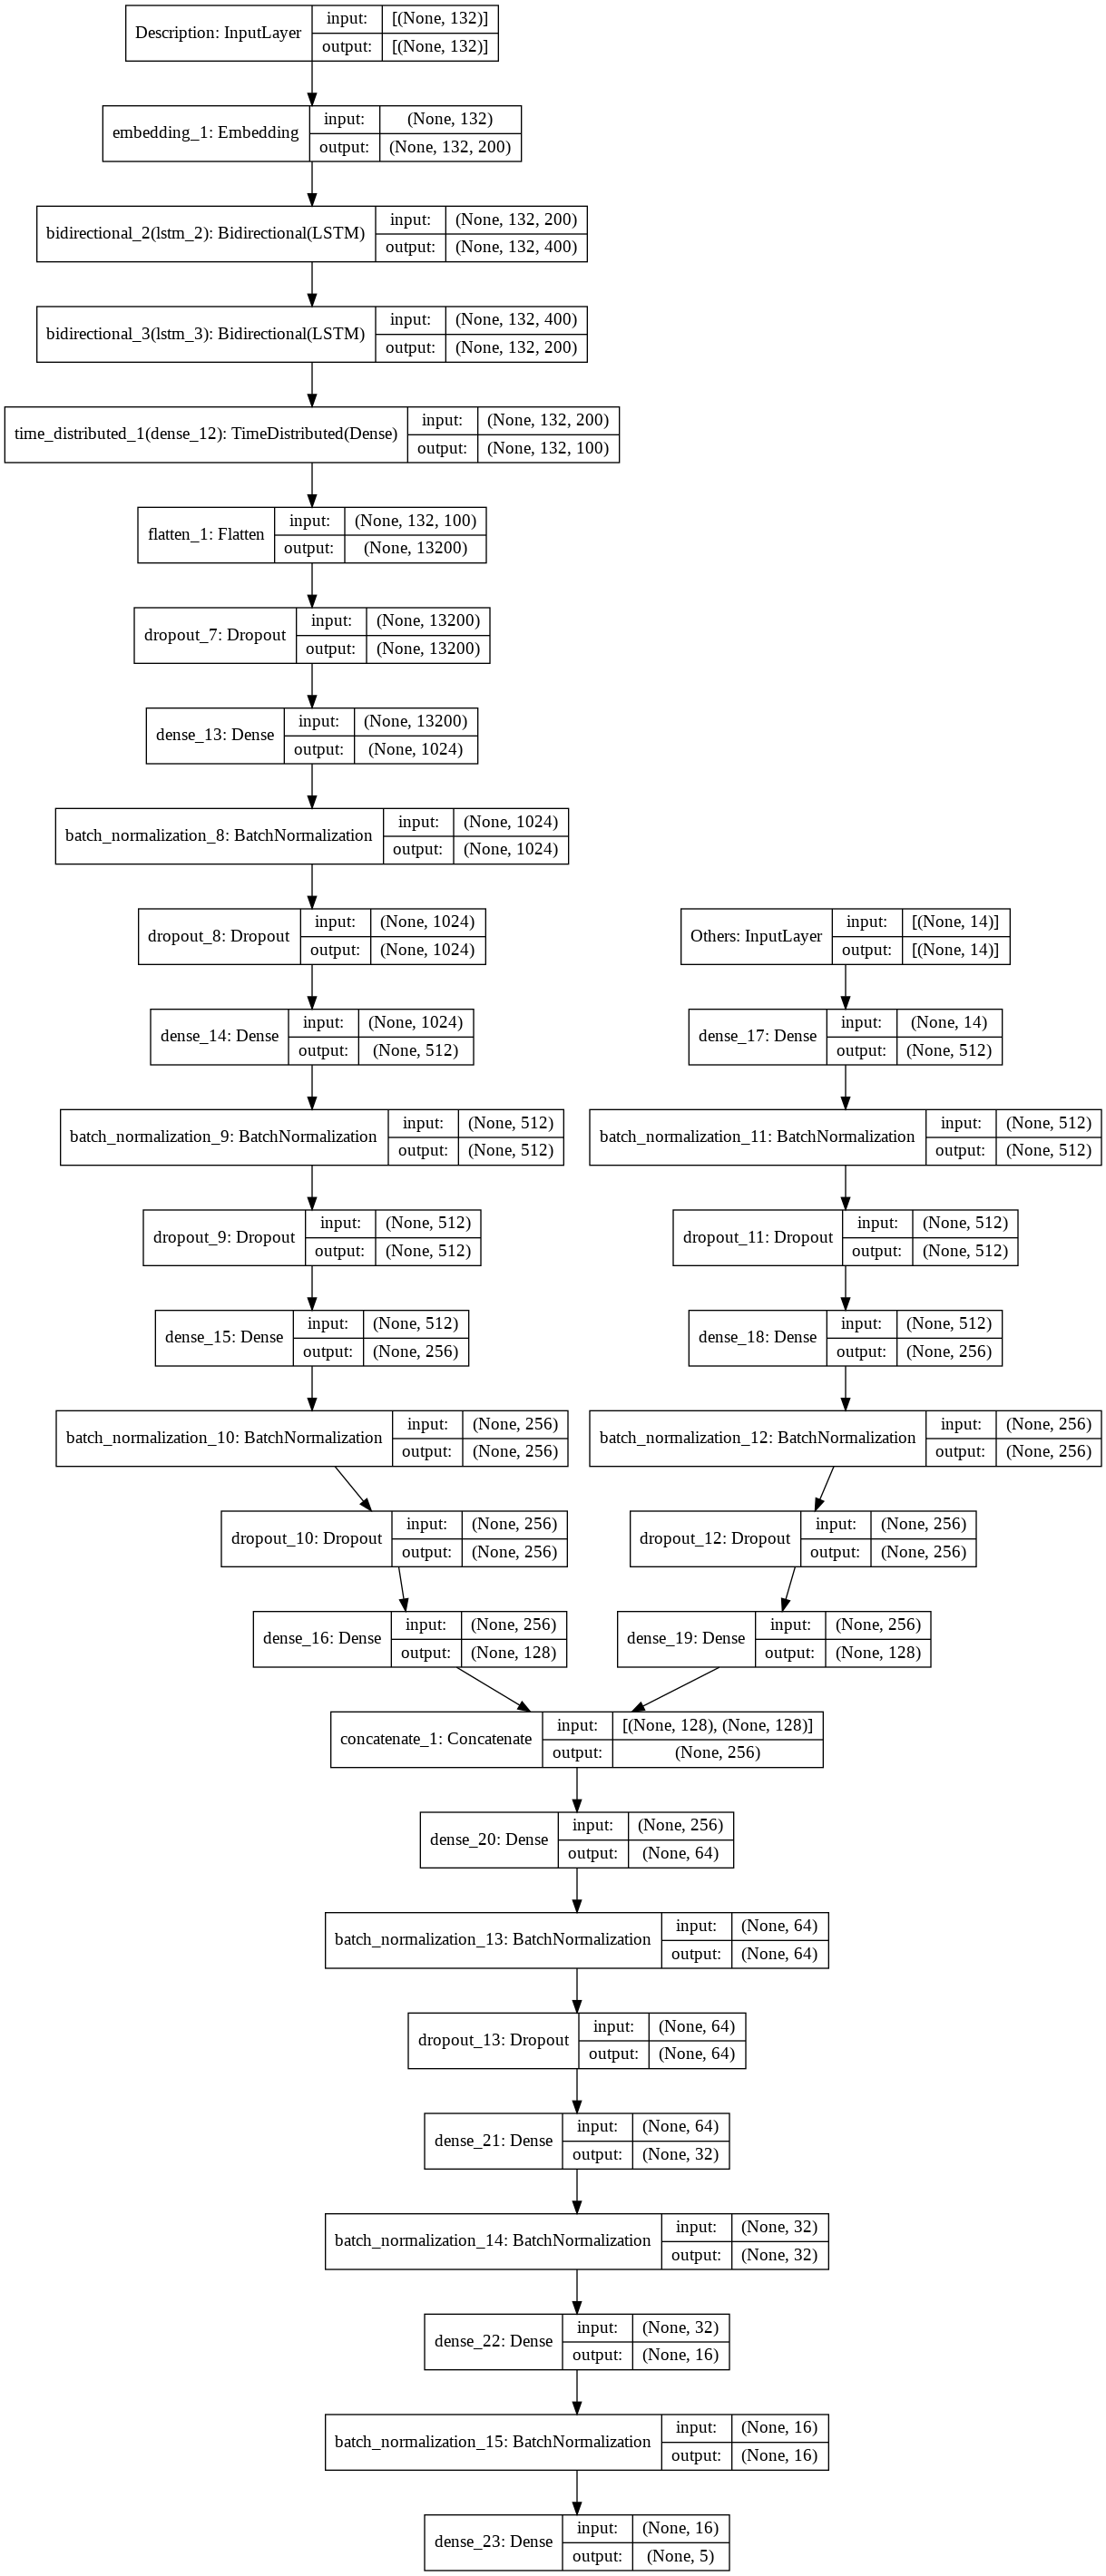

In [ ]:
keras.utils.plot_model(Final_Model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.001) 
Final_Model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=True)
stop = EarlyStopping(monitor="val_loss", patience=5)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, min_lr=1e-20, verbose=1)
callbacks=[checkpoint,reduce_lr]

In [ ]:
one_hot_encoder=OneHotEncoder()
y_temp_train=one_hot_encoder.fit_transform(Y_train[0].reshape(-1,1))
y_temp_test=one_hot_encoder.transform(Y_test[0].reshape(-1,1))

In [ ]:
y_temp_test.todense()

In [ ]:
history_non_smote=Final_Model.fit({'Description':x_train_description[0],'Others':x_train_others[0]},y_temp_train.todense(),
                validation_data=({'Description':x_test_description[0],'Others':x_test_others[0]},y_temp_test.todense()),
                batch_size=32,callbacks=callbacks,epochs=50)#,class_weight=weights)

Epoch 1/50
11/11 [==============================] - 38s 3s/step - loss: 1.8449 - accuracy: 0.2589 - val_loss: 1.7665 - val_accuracy: 0.3478

Epoch 00001: val_loss improved from inf to 1.76646, saving model to model-1.77.h5
Epoch 2/50
11/11 [==============================] - 27s 2s/step - loss: 1.1992 - accuracy: 0.4838 - val_loss: 2.0267 - val_accuracy: 0.2783

Epoch 00002: val_loss did not improve from 1.76646
Epoch 3/50
11/11 [==============================] - 26s 2s/step - loss: 1.0541 - accuracy: 0.6070 - val_loss: 1.6101 - val_accuracy: 0.4087

Epoch 00003: val_loss improved from 1.76646 to 1.61012, saving model to model-1.61.h5
Epoch 4/50
11/11 [==============================] - 26s 2s/step - loss: 0.8563 - accuracy: 0.6815 - val_loss: 1.4356 - val_accuracy: 0.5043

Epoch 00004: val_loss improved from 1.61012 to 1.43555, saving model to model-1.44.h5
Epoch 5/50
11/11 [==============================] - 26s 2s/step - loss: 0.8247 - accuracy: 0.7520 - val_loss: 1.1031 - val_accuracy

In [ ]:
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import confusion_matrix
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split,KFold 
# from sklearn import svm
# from sklearn.model_selection import cross_val_score

In [ ]:
# optimum_param=cross_validate(estimator=Final_Model,
#                              X=pd.concat([x_train[last_sample],x_test[last_sample]]),y=np.hstack((y_train[last_sample],y_test[last_sample])),cv=KFold(10,True,0),scoring=['balanced_accuracy','precision_weighted','recall_weighted','f1_weighted'])  
  

In [ ]:

# def Voting_ML_classifier(x_train_description,x_train_others,x_test_description,x_test_others,y_train,y_test,name,base_classifier,last_sample):
    
#   for i in range(0,len(base_classifier)):
#     # print(i)
#     base_classifier[i][1].fit({'Description':x_train_description[i],'Others':x_train_others[i]},Y_train[i],
#                 validation_data=({'Description':x_test_description[i],'Others':x_test_others[i]},Y_test[i]),
#                 batch_size=32,callbacks=callbacks,epochs=10)#,class_weight=weights)
#   model = VotingClassifier(estimators=base_classifier)


#   optimum_param=cross_validate(estimator=model,X=pd.concat([x_train[last_sample],x_test[last_sample]]),y=np.hstack((y_train[last_sample],y_test[last_sample])),cv=KFold(10,True,0),scoring=['balanced_accuracy','precision_weighted','recall_weighted','f1_weighted'])  
#   print('***************VALIDATION DATA METRICS(CROSS VALIDATION SCORES) ************************************************')
#   # print(optimum_param)
#   print("Balanced Accuracy Score is: %.3f%% (%.3f%%)" % (optimum_param['test_balanced_accuracy'].mean()*100, optimum_param['test_balanced_accuracy'].std()*100))
#   print("Weighted Precison Score  is: %.3f%% (%.3f%%)" % (optimum_param['test_precision_weighted'].mean()*100, optimum_param['test_precision_weighted'].std()*100))
#   print("Weighted Recall Score is: %.3f%% (%.3f%%)" % (optimum_param['test_recall_weighted'].mean()*100, optimum_param['test_recall_weighted'].std()*100))
#   print("Weighted F-1 Score is: %.3f%% (%.3f%%)" % (optimum_param['test_f1_weighted'].mean()*100, optimum_param['test_f1_weighted'].std()*100))
  
#   accuracy_score_mean_value,accuracy_score_std_value=optimum_param['test_balanced_accuracy'].mean()*100,optimum_param['test_balanced_accuracy'].std()*100
#   precision_score_mean_value,precision_score_std_value=optimum_param['test_precision_weighted'].mean()*100,optimum_param['test_precision_weighted'].std()*100
#   recall_score_mean_value,recall_score_std_value=optimum_param['test_recall_weighted'].mean()*100,optimum_param['test_recall_weighted'].std()*100
#   f1_score_mean_value,f1_score_std_value=optimum_param['test_f1_weighted'].mean()*100,optimum_param['test_f1_weighted'].std()*100
  
#   print()
#   print('***************TESTING DATA METRICS(CURRENT SAMPLE SCORE) ************************************************')

#   model.fit({'Description':x_train_description[last_sample],'Others':x_train_others[last_sample]},Y_train[last_sample],
#                 validation_data=({'Description':x_test_description[last_sample],'Others':x_test_others[last_sample]},Y_test[last_sample]),
#                 batch_size=32,callbacks=callbacks,epochs=10)#,class_weight=weights)
#   y_pred = model.predict({'Description':x_test_description[last_sample],'Others':x_test_others[last_sample]})
#   print(classification_report(y_test[last_sample],y_pred))
#   print(confusion_matrix(y_test[last_sample],y_pred))
  
  
#   ll,ul=y_pred.mean()-1.96*(y_pred.std()/len(y_pred)),y_pred.mean()+1.96*(y_pred.std()/len(y_pred))
#   print('Lower Limit of Confidence Interval:',ll)
#   print('Upper Limit of Confidence Interval:',ul)
#   print('Standard Mean:',y_test[last_sample].mean())
#   if y_test[last_sample].mean() >=ll and y_test[last_sample].mean()<=ul :
#     print('95% confidence level')
#   else:
#     print('confidence level not achieved')
  
#   name=name+' Default'
#   path='/content/drive/MyDrive/NLP_Chatbot_Capstone_Project/Trained Default Machine Learning Classifiers/'
#   with open(path+'Model_'+str(name),'wb') as f:
#     pickle.dump(model,f)

#   train_f1_score=f1_score(y_train[last_sample], model.predict(x_train[last_sample]), average='weighted')
  
#   final_metrics=[train_f1_score,accuracy_score_mean_value,precision_score_mean_value,recall_score_mean_value,f1_score_mean_value,
#   accuracy_score(y_test[last_sample], y_pred),precision_score(y_test[last_sample], y_pred, average='weighted'),
#   recall_score(y_test[last_sample], y_pred, average='weighted'),f1_score(y_test[last_sample], y_pred, average='weighted')]
#   return final_metrics
#   return 0


In [ ]:
# name='Voting Classifier'
# base_classifier=[ ('LSTM_'+str(i),Final_Model) for i in range(0,8)]
# print('Name of Algorithm/Classifier Used:',name)
# print()

# last_sample=len(base_classifier)-1
# final_metrics=Voting_ML_classifier(x_train_description,x_train_others,x_test_description,x_test_others,Y_train,Y_test,name,base_classifier,last_sample)
# f1_score_train_score_sample,accuracy,precision,recall,f1_score_test=final_metrics[0],final_metrics[1],final_metrics[2],final_metrics[3],final_metrics[4]
# accuracy_score_sample,precision_score_sample,recall_score_sample,f1_score_sample=final_metrics[5],final_metrics[6],final_metrics[7],final_metrics[8]
# test_score_classifiers_default.append([f1_score_train_score_sample,accuracy,precision,recall,f1_score_test,name])
# print()
# print('Weighted F-1 Score for the Current Sample of Training Data:',f1_score_train_score_sample)
# print()
# print('Accuracy Score for the Current Sample of Testing Data:',accuracy_score_sample)
# print('Weighted Precision Score for the Current Sample of Testing Data:',precision_score_sample)
# print('Weighted Recall Score for the Current Sample of Testing Data:',recall_score_sample)
# print('Weighted F-1 Score for the Current Sample of Testing Data:',f1_score_sample)

In [ ]:
Y_train[0]

array([2., 0., 2., 3., 0., 0., 4., 0., 2., 2., 0., 4., 3., 4., 0., 3., 3.,
       0., 2., 2., 1., 4., 4., 4., 2., 2., 3., 1., 3., 2., 2., 1., 3., 0.,
       2., 3., 3., 1., 0., 2., 0., 2., 4., 3., 0., 0., 2., 2., 2., 1., 1.,
       3., 1., 0., 2., 1., 2., 1., 3., 4., 3., 0., 2., 4., 1., 0., 1., 4.,
       1., 1., 2., 3., 3., 1., 2., 3., 1., 1., 1., 3., 2., 1., 3., 3., 1.,
       1., 1., 3., 3., 2., 1., 0., 4., 2., 0., 0., 0., 0., 0., 2., 3., 3.,
       4., 1., 4., 3., 2., 1., 3., 1., 0., 3., 1., 2., 0., 1., 4., 0., 4.,
       0., 3., 4., 2., 0., 3., 4., 1., 4., 0., 0., 1., 2., 2., 2., 4., 1.,
       2., 1., 1., 1., 3., 2., 2., 1., 3., 3., 1., 4., 1., 1., 0., 0., 1.,
       1., 1., 1., 2., 3., 3., 0., 2., 2., 0., 4., 3., 0., 3., 4., 1., 2.,
       0., 4., 4., 1., 2., 2., 0., 2., 1., 2., 1., 1., 1., 2., 3., 1., 3.,
       0., 2., 2., 1., 3., 0., 4., 1., 2., 2., 0., 3., 3., 4., 2., 2., 3.,
       3., 4., 0., 2., 1., 0., 3., 0., 1., 0., 4., 0., 0., 2., 0., 1., 3.,
       3., 3., 1., 1., 0.

In [ ]:
history_non_smote

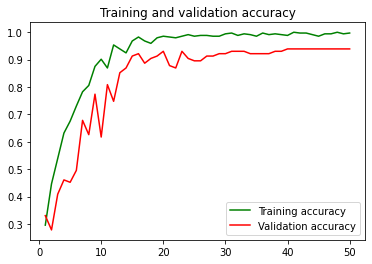

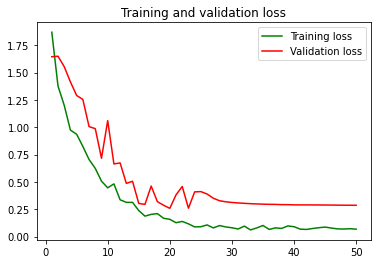

In [ ]:
acc = history_non_smote.history['accuracy']
val_acc = history_non_smote.history['val_accuracy']
loss = history_non_smote.history['loss']
val_loss = history_non_smote.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
y_pred=Final_Model.predict({'Description':x_test_description[0],'Others':x_test_others[0]})

In [ ]:
y_pred[0]

array([0.00895293, 0.00407171, 0.97834307, 0.00516899, 0.00346335],
      dtype=float32)

In [ ]:
y_test[0]

2.0

In [ ]:
y_pred_labels=[]
for i in range(0,len(y_pred)):
  y_pred_labels.append(float(list(y_pred[i]).index(max(y_pred[i]))))

In [ ]:
y_pred_labels[0]

2.0

In [ ]:
 from sklearn.metrics import confusion_matrix
 from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred_labels)#,labels=list(set(accident_level_encoded)))

array([[24,  3,  0,  0,  0],
       [ 2, 23,  0,  0,  0],
       [ 2,  0, 22,  0,  0],
       [ 0,  0,  0, 25,  0],
       [ 0,  0,  0,  0, 14]])

Additional Code

In [ ]:

# def ML_classifier(x_train,x_test,y_train,y_test,name,classifier):
#   model= classifier  
#   optimum_param=cross_validate(estimator=model,X=pd.concat([x_train,x_test]),y=np.hstack((y_train,y_test)),cv=KFold(10,True,0),scoring=['balanced_accuracy','precision_weighted','recall_weighted','f1_weighted'])  
#   print('***************VALIDATION DATA METRICS(CROSS VALIDATION SCORES) ************************************************')
#   # print(optimum_param)
#   print("Balanced Accuracy Score is: %.3f%% (%.3f%%)" % (optimum_param['test_balanced_accuracy'].mean()*100, optimum_param['test_balanced_accuracy'].std()*100))
#   print("Weighted Precison Score  is: %.3f%% (%.3f%%)" % (optimum_param['test_precision_weighted'].mean()*100, optimum_param['test_precision_weighted'].std()*100))
#   print("Weighted Recall Score is: %.3f%% (%.3f%%)" % (optimum_param['test_recall_weighted'].mean()*100, optimum_param['test_recall_weighted'].std()*100))
#   print("Weighted F-1 Score is: %.3f%% (%.3f%%)" % (optimum_param['test_f1_weighted'].mean()*100, optimum_param['test_f1_weighted'].std()*100))
  
#   accuracy_score_mean_value,accuracy_score_std_value=optimum_param['test_balanced_accuracy'].mean()*100,optimum_param['test_balanced_accuracy'].std()*100
#   precision_score_mean_value,precision_score_std_value=optimum_param['test_precision_weighted'].mean()*100,optimum_param['test_precision_weighted'].std()*100
#   recall_score_mean_value,recall_score_std_value=optimum_param['test_recall_weighted'].mean()*100,optimum_param['test_recall_weighted'].std()*100
#   f1_score_mean_value,f1_score_std_value=optimum_param['test_f1_weighted'].mean()*100,optimum_param['test_f1_weighted'].std()*100
  
#   print()
#   print('***************TESTING DATA METRICS(CURRENT SAMPLE SCORE) ************************************************')

#   model.fit(X=x_train, y=y_train)
#   y_pred = model.predict(X=x_test)
#   print(classification_report(y_test,y_pred))
#   print(confusion_matrix(y_test,y_pred))
  
  
#   ll,ul=y_pred.mean()-1.96*(y_pred.std()/len(y_pred)),y_pred.mean()+1.96*(y_pred.std()/len(y_pred))
#   print('Lower Limit of Confidence Interval:',ll)
#   print('Upper Limit of Confidence Interval:',ul)
#   print('Standard Mean:',y_test.mean())
#   if y_test.mean() >=ll and y_test.mean()<=ul :
#     print('95% confidence level')
#   else:
#     print('confidence level not achieved')
  
#   name=name+' Default'
#   path='/content/drive/MyDrive/NLP_Chatbot_Capstone_Project/Trained Default Machine Learning Classifiers/'
#   with open(path+'Model_'+str(name),'wb') as f:
#     pickle.dump(model,f)

#   train_f1_score=f1_score(y_train, model.predict(x_train), average='weighted')
  
#   final_metrics=[train_f1_score,accuracy_score_mean_value,precision_score_mean_value,recall_score_mean_value,f1_score_mean_value,
#   accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average='weighted'),
#   recall_score(y_test, y_pred, average='weighted'),f1_score(y_test, y_pred, average='weighted')]
#   return final_metrics


In [ ]:
# # Bagging Classifier
# from sklearn.ensemble import BaggingClassifier
# name='Bagging'
# classifier = BaggingClassifier(base_estimator=Final_Model)
# print('Name of Algorithm/Classifier Used:',name)
# print()

# final_metrics=ML_classifier({'Description':x_train_description,'Others':x_train_others},{'Description':x_test_description,'Others':x_test_others},Y_train[0],Y_test[0],name,classifier)
# f1_score_train_score_sample,accuracy,precision,recall,f1_score_test=final_metrics[0],final_metrics[1],final_metrics[2],final_metrics[3],final_metrics[4]
# accuracy_score_sample,precision_score_sample,recall_score_sample,f1_score_sample=final_metrics[5],final_metrics[6],final_metrics[7],final_metrics[8]
# test_score_classifiers_default.append([f1_score_train_score_sample,accuracy,precision,recall,f1_score_test,name])
# print()
# print('Weighted F-1 Score for the Current Sample of Training Data:',f1_score_train_score_sample)
# print()
# print('Accuracy Score for the Current Sample of Testing Data:',accuracy_score_sample)
# print('Weighted Precision Score for the Current Sample of Testing Data:',precision_score_sample)
# print('Weighted Recall Score for the Current Sample of Testing Data:',recall_score_sample)
# print('Weighted F-1 Score for the Current Sample of Testing Data:',f1_score_sample)